In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
import pandas as pd
import numpy as np

In [ ]:
#--------
df_cc = pd.read_csv("/content/drive/MyDrive/IR_Project4/chitchat_csv.csv")

In [ ]:
#--------# df_re = pd.read_csv('/content/drive/MyDrive/IR_Project4/Copy of IR4.csv')
df = pd.read_pickle("/content/drive/MyDrive/IR_Project4/comments.pkl")  
df.head()

,author,body,created_utc,id,parent_id,permalink,score,subreddit,created,d_,full_link,created_at,is_submission,parent_body
0,Addy_Bishop,I meant the warren buffet level stocks. I was...,1652069249,i7vqq7u,t1_i7vq8qp,/r/explainlikeimfive/comments/ubrebd/eli5_wher...,1,explainlikeimfive,1.652069e+09,"{'author': 'Addy_Bishop', 'body': 'I meant the...",https://www.reddit.com/r/explainlikeimfive/com...,2022-05-09T04:07:29Z,False,what did u mean by ultra rich things? stocks? ...
1,kxleepy,what did u mean by ultra rich things? stocks? ...,1652068956,i7vq8qp,t1_i7vq3lh,/r/explainlikeimfive/comments/ubrebd/eli5_wher...,1,explainlikeimfive,1.652069e+09,"{'author': 'kxleepy', 'body': 'what did u mean...",https://www.reddit.com/r/explainlikeimfive/com...,2022-05-09T04:02:36Z,False,I started reading about it and it’s very inter...
2,Addy_Bishop,I started reading about it and it’s very inter...,1652068871,i7vq3lh,t1_i7pp9dc,/r/explainlikeimfive/comments/ubrebd/eli5_wher...,1,explainlikeimfive,1.652069e+09,"{'author': 'Addy_Bishop', 'body': 'I started r...",https://www.reddit.com/r/explainlikeimfive/com...,2022-05-09T04:01:11Z,False,The company in which Warren Buffett is the cha...
3,kxleepy,The company in which Warren Buffett is the cha...,1651952857,i7pp9dc,t1_i66jemd,/r/explainlikeimfive/comments/ubrebd/eli5_wher...,1,explainlikeimfive,1.651953e+09,"{'author': 'kxleepy', 'body': 'The company in ...",https://www.reddit.com/r/explainlikeimfive/com...,2022-05-07T19:47:37Z,False,That makes sense! Although just curious...who ...
4,Addy_Bishop,I think I grasp the basics but in this scenari...,1651188937,i6lkqkl,t1_i6ktgl6,/r/explainlikeimfive/comments/ubrebd/eli5_wher...,1,explainlikeimfive,1.651189e+09,"{'author': 'Addy_Bishop', 'body': 'I think I g...",https://www.reddit.com/r/explainlikeimfive/com...,2022-04-28T23:35:37Z,False,"right...sort of. In that scenario, you would t..."


In [ ]:
df_re = df[['body','parent_body']]

In [ ]:
df_re.head(20)

,body,parent_body
0,I meant the warren buffet level stocks. I was...,what did u mean by ultra rich things? stocks? ...
1,what did u mean by ultra rich things? stocks? ...,I started reading about it and it’s very inter...
2,I started reading about it and it’s very inter...,The company in which Warren Buffett is the cha...
3,The company in which Warren Buffett is the cha...,That makes sense! Although just curious...who ...
4,I think I grasp the basics but in this scenari...,"right...sort of. In that scenario, you would t..."
5,"right...sort of. In that scenario, you would t...",So it really IS like shark tank! The agree on...
6,Yeah it’s not my thing but then again I have n...,Yeah. But what I don’t understand is why buy a...
7,Yeah. But what I don’t understand is why buy a...,I think that’s it. Just buying into the idea ...
8,I’ll try giving this a read. Thank you 😄,I think at this point an article would serve y...
9,I think that’s it. Just buying into the idea ...,Yeah true. But what I’m talking about is stock...


In [ ]:
df_re['class'] = 1
df_re.head()

<ipython-input-12-5be59d9b7888>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_re['class'] = 1


,body,parent_body,class
0,I meant the warren buffet level stocks. I was...,what did u mean by ultra rich things? stocks? ...,1
1,what did u mean by ultra rich things? stocks? ...,I started reading about it and it’s very inter...,1
2,I started reading about it and it’s very inter...,The company in which Warren Buffett is the cha...,1
3,The company in which Warren Buffett is the cha...,That makes sense! Although just curious...who ...,1
4,I think I grasp the basics but in this scenari...,"right...sort of. In that scenario, you would t...",1


In [ ]:
df_re_temp = df_re[['parent_body','class']]

In [ ]:
df = pd.concat([df_cc, df_re], axis=0)
df.tail()

,Unnamed: 0,query,prompt,reply,class,body,parent_body
68486,NaN,NaN,NaN,NaN,1,Not a structural guy. ME (sitting for PE this ...,I personally have a mechanical engineering deg...
68487,NaN,NaN,NaN,NaN,1,SLO and UCSD does. It's a program with SE focu...,What's an SE degree? I might tell a layperson ...
68488,NaN,NaN,NaN,NaN,1,There’s a couple of programs that are SE focus...,What's an SE degree? I might tell a layperson ...
68489,NaN,NaN,NaN,NaN,1,I have an master’s in architecture in addition...,I personally have a mechanical engineering deg...
68490,NaN,NaN,NaN,NaN,1,What's an SE degree? I might tell a layperson ...,I personally have a mechanical engineering deg...


In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.groupby("class").count()

,Unnamed: 0,query,prompt,reply,body,parent_body
class,,,,,,
0,74021,74013,73992,74016,0,0
1,0,0,0,0,68491,68491


In [ ]:
df['class'].value_counts()

0    74021
1    68491
Name: class, dtype: int64

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
batch_size = 64
epochs = 20
latent_dim = 256
num_sam = 500

In [ ]:
ip_text = []
tar_text = []


In [ ]:
from keras.preprocessing.text import one_hot

In [ ]:
voc_size = 10000

In [ ]:
import nltk

In [ ]:
from gensim.models import Word2Vec
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.to_pickle("/content/drive/MyDrive/IR_Project4/combined_cc_red.pkl")  

In [ ]:
temp=pd.DataFrame()
temp['query'] = df['parent_body']
# temp.rename({'parent_body':'query'},inplace=True)

In [ ]:
temp.tail()

,query
142507,I personally have a mechanical engineering deg...
142508,What's an SE degree? I might tell a layperson ...
142509,What's an SE degree? I might tell a layperson ...
142510,I personally have a mechanical engineering deg...
142511,I personally have a mechanical engineering deg...


In [ ]:
df_re_temp.rename(columns={'parent_body':'query'},inplace=True)

<ipython-input-24-05ec8aa8c17d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_re_temp.rename(columns={'parent_body':'query'},inplace=True)


In [ ]:
df_re_temp.head()

,query,class
0,what did u mean by ultra rich things? stocks? ...,1
1,I started reading about it and it’s very inter...,1
2,The company in which Warren Buffett is the cha...,1
3,That makes sense! Although just curious...who ...,1
4,"right...sort of. In that scenario, you would t...",1


In [ ]:
df_cc_temp = df_cc[['query','class']]

In [ ]:
df_cc_temp.head()

,query,class
0,Hello How are you doing today?,0
1,"Im alright, I just took a nap. But it was one ...",0
2,Yeah,0
3,I have more of a head ache than anything else,0
4,"No, Its just adjusting to a time change But en...",0


In [ ]:
import regex as re
def process(query):
    pattern = r'[^a-z0-9 ]'
    query = query.lower()
    query = re.sub(pattern, '', query)
    spq = query.split()
    
    tmp = []
    for item in spq:
      if len(item) >2 or (item not in stop):

        tmp.append(item)
    query = ' '.join(tmp)
    return query

# if 'no' in stop:
#   print('yes')

In [ ]:
process('i live in thE YG G FYYGYT city so fg who they how are you doing')

'live the yg g fyygyt city fg who they how are you doing'

In [ ]:
df_re_temp['query'] = df_re_temp['query'].apply(lambda x:process(x))

<ipython-input-30-c1a89d17930c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_re_temp['query'] = df_re_temp['query'].apply(lambda x:process(x))


In [ ]:
df_cc_temp['query'].isnull().sum()

8

In [ ]:
df_cc_temp = df_cc_temp.dropna()

In [ ]:
df_cc_temp['query'] = df_cc_temp['query'].apply(lambda x:process(x))

In [ ]:
train_df = pd.concat([df_cc_temp, df_re_temp], axis=0)


In [ ]:
# train_df.tail()
train_df = train_df.reindex()


In [ ]:
train_df.tail()

,query,class
68486,personally have mechanical engineering degree ...,1
68487,whats se degree might tell layperson that have...,1
68488,whats se degree might tell layperson that have...,1
68489,personally have mechanical engineering degree ...,1
68490,personally have mechanical engineering degree ...,1


In [ ]:
train_df.to_pickle("/content/drive/MyDrive/IR_Project4/train_cc_red.pkl")  

In [18]:
import pandas as pd

In [10]:

train_df = pd.read_pickle("/content/drive/MyDrive/IR_Project4/train_cc_red.pkl")  
train_df.tail()

,query,class
142507,personally mechanical engineering degree work ...,1
142508,hats degree might tell layperson degree tructu...,1
142509,hats degree might tell layperson degree tructu...,1
142510,personally mechanical engineering degree work ...,1
142511,personally mechanical engineering degree work ...,1


In [11]:
train_df['class'].value_counts()

0    74021
1    68491
Name: class, dtype: int64

In [21]:
# train_df = train_df.dropna()
train_df['query'].isnull().sum()

0

In [ ]:
train_df = train_df.reset_index(drop=True)

In [22]:
train_df

,query,class
0,hello how are you doing today,0
1,im alright just took nap but was one those nap...,0
2,yeah,0
3,have more head ache than anything else,0
4,its just adjusting time change but enough abou...,0
...,...,...
142499,personally have mechanical engineering degree ...,1
142500,whats se degree might tell layperson that have...,1
142501,whats se degree might tell layperson that have...,1
142502,personally have mechanical engineering degree ...,1


In [ ]:
reddit = train_df.iloc[10001:]

In [ ]:
reddit.head()

,query,class
10001,I think that’s it. Just buying into the idea ...,1
10002,I think at this point an article would serve y...,1
10003,Yeah true. But what I’m talking about is stock...,1
10004,Uh oh. Once again I’m a little lost. Why wou...,1
10005,But I thought the point was to take a gamble t...,1


In [ ]:
reddit['query'] = reddit['query'].apply(lambda x:process(x))


<ipython-input-17-ad9f89dd7b8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reddit['query'] = reddit['query'].apply(lambda x:process(x))


In [ ]:
reddit.head()

In [ ]:
cc = train_df.iloc[:10000]

In [ ]:
new_tr = pd.concat([cc, reddit], axis=0)


In [ ]:
new_tr

,query,class
0,Hello How are you doing today?,0
1,"Im alright, I just took a nap. But it was one ...",0
2,Yeah,0
3,I have more of a head ache than anything else,0
4,"No, Its just adjusting to a time change But en...",0
...,...,...
19996,,1
19997,,1
19998,agree everything wrotegt hen see elites flee e...,1
19999,callous people epublicans old people dying spa...,1


In [ ]:
!pip install tensorflow_text

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df['query'],train_df['class'], stratify=train_df['class'])


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text


bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']


In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])



In [ ]:

model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    

In [ ]:
len(X_train)


106878

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)


In [ ]:
model.fit(X_train, y_train, epochs=7)

Epoch 1/7
3340/3340 [==============================] - 1216s 363ms/step - loss: 0.3780 - accuracy: 0.8342 - precision: 0.8657 - recall: 0.7754
Epoch 2/7
3340/3340 [==============================] - 1195s 358ms/step - loss: 0.3322 - accuracy: 0.8569 - precision: 0.8837 - recall: 0.8088
Epoch 3/7
3340/3340 [==============================] - 1193s 357ms/step - loss: 0.3235 - accuracy: 0.8618 - precision: 0.8868 - recall: 0.8167
Epoch 4/7
3340/3340 [==============================] - 1193s 357ms/step - loss: 0.3214 - accuracy: 0.8632 - precision: 0.8867 - recall: 0.8200
Epoch 5/7
3340/3340 [==============================] - 1193s 357ms/step - loss: 0.3197 - accuracy: 0.8631 - precision: 0.8853 - recall: 0.8216
Epoch 6/7
3340/3340 [==============================] - 1193s 357ms/step - loss: 0.3193 - accuracy: 0.8635 - precision: 0.8861 - recall: 0.8215
Epoch 7/7
3340/3340 [==============================] - 1192s 357ms/step - loss: 0.3174 - accuracy: 0.8648 - precision: 0.8867 - recall: 0.8239

In [ ]:
tf.saved_model.save(model, "/content/drive/MyDrive/IR_Project4/classmodel_new_full_x")

In [ ]:
!pip install tensorflow-text
import tensorflow as tf
import tensorflow_text

In [14]:
loaded_model_wo = tf.saved_model.load("/content/drive/MyDrive/IR_Project4/classmodel_new_full")


In [ ]:
model.save('/content/drive/MyDrive/IR_Project4/classmodel_newfull2')

In [15]:
from tensorflow import keras
model1 = keras.models.load_model("/content/drive/MyDrive/IR_Project4/classmodel_newfull2")

In [25]:
X_test[:10], y_test[:10]

(14049                     would impossible steer that speed
 107520                             still chopstick occasion
 104928    know the game goes easier though ive never bee...
 87548                                                      
 24311                                                 hello
 23890     like juliet marillier shes not quite wellknown...
 16679                                                cya kj
 93738     get what you are saying and makes sense that s...
 70675     oh guess know that one but otherwise personall...
 30187                          what northern city you going
 Name: query, dtype: object,
 14049     0
 107520    1
 104928    1
 87548     1
 24311     0
 23890     0
 16679     0
 93738     1
 70675     0
 30187     0
 Name: class, dtype: int64)

In [46]:
y_predicted[:10]

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
model1.evaluate(X_test, y_test)

In [30]:
y_predicted = model1.predict(X_test)
y_predicted = y_predicted.flatten()


1114/1114 [==============================] - 385s 344ms/step


In [31]:
y_predicted

array([0.11417907, 0.06251982, 0.41006353, ..., 0.10015475, 0.03890593,
       0.09337164], dtype=float32)

In [55]:
y_predicted = np.where(y_predicted >= 0.4, 1, 0)
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

array([[17808,   695],
       [ 3783, 13340]])

In [54]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

array([[17808,   695],
       [ 3783, 13340]])

Text(50.722222222222214, 0.5, 'Truth')

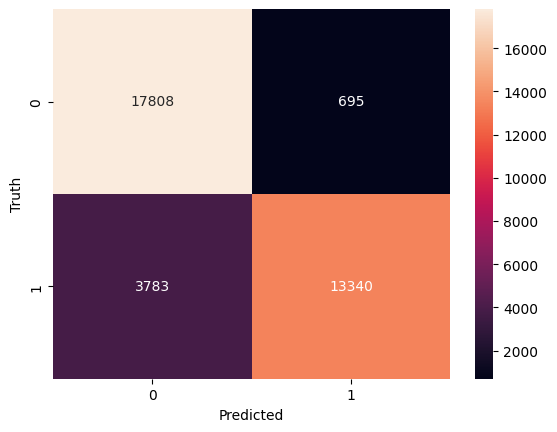

In [45]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [48]:
reviews = [
    "hello!",
    "medicine vaccine?",
    "took a nap",
    "how are you",
    "csmajors",
    "tedtalk"
    "money politics"
]
model1.predict(reviews)


1/1 [==============================] - 2s 2s/step


array([[0.01847125],
       [0.13709727],
       [0.035457  ],
       [0.00860311],
       [0.44613543],
       [0.40347582]], dtype=float32)

T5